#### Laboratorio 2

##### Javier Valle 20159
##### Mario de León 19029

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.optimizers import RMSprop, Adagrad, Adam

##### Analizando el dataset.

In [2]:
# Importando el dataset.
dataset = "dataset.csv"

# Cargando el dataset.
df = pd.read_csv(dataset)

# Imprimiendo el dataset.
df

# Imprimiendo los títulos del dataset.
df.columns

# Objetivo de la red: Clasificación.

# Posibles variables a utilizar para clasificar: 
# 1. Production budget $
# 2. Worldwide gross $
# 3. Domestic gross $


Index(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $'],
      dtype='object')

##### Imprimiendo las columnas elegidas del dataset.

In [3]:
# Imprimiedo las columnas a utilizar (movie_averageRating, movie_numerOfVotes y approval_Index).

# Seleccionamos las columnas que queremos combinar
selected_columns = ['Production budget $', 'Worldwide gross $', 'Domestic gross $']

# Utilizamos la función concat() para combinar las columnas en una sola variable
combined_variable = pd.concat([df[col] for col in selected_columns], axis=1)

# Renombramos las columnas del nuevo DataFrame resultante
combined_variable.columns = ['movie_averageRating', 'movie_numerOfVotes', 'approval_Index']

# Ahora 'combined_variable' contiene todas las columnas seleccionadas combinadas en una sola variable
print(combined_variable)

      movie_averageRating  movie_numerOfVotes  approval_Index
0               460000000          2265935552       667830256
1               400000000          2794731755       858373000
2               379000000          1045713802       241071802
3               365000000          1395316979       459005868
4               300000000          2048359754       678815482
...                   ...                 ...             ...
4375                65000            22233808        11529368
4376                50000            10426506        10426506
4377                50000             2335352         2335352
4378                50000              424149          391674
4379                50000                8374            8374

[4380 rows x 3 columns]


##### Creando one-hot encoding - movie_title

In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['movie_title'], prefix='movie_title')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['movie_title'], axis=1, inplace=True)

##### Creando un X y un Y para el entrenamiento.

In [5]:
# En la variable X se necesitaría meter esto 'Production budget $', 'Worldwide gross $', 'Domestic gross $'

X = df[['movie_averageRating', 'movie_numerOfVotes', 'approval_Index']]

# En el eje y sería esto 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index'.
Y = df[['Production budget $', 'Worldwide gross $', 'Domestic gross $']]

##### Entrenamiento general.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    )

# Verificando los resultados.
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (3504, 3)
X_test:  (876, 3)
y_train:  (3504, 3)
y_test:  (876, 3)


##### Creando la red

In [7]:
# Nueva arquitectura ajustada
batched_model1 = Sequential([
    Dense(128, input_shape=(3,), activation="relu"),   # Aumentamos el número de neuronas a 128
    BatchNormalization(),
    Dense(256, activation='relu'),                      # Aumentamos el número de neuronas a 256
    BatchNormalization(),
    Dense(256, activation='relu'),                      # Aumentamos el número de neuronas a 256
    BatchNormalization(),
    Dense(128, activation='relu'),                      # Ajustamos las neuronas a 128
    BatchNormalization(),
    Dense(64, activation='relu'),                       # Ajustamos las neuronas a 64
    BatchNormalization(),
    Dense(3, activation='softmax')
])

In [8]:
# Compilar el modelo con RMSprop como optimizador
batched_model1.compile(
    optimizer=RMSprop(), 
    loss='mean_squared_error', 
    metrics=['accuracy']
)

##### Viendo los resultados de la red neuronal.

In [9]:
batched_history1 =  batched_model1.fit(
    X_train, 
    y_train,
    epochs=100, 
    validation_split=0.75,
    batch_size=500,
    verbose=2
)

Epoch 1/100
2/2 - 1s - loss: 24268540907356160.0000 - accuracy: 0.5137 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7222 - 1s/epoch - 681ms/step
Epoch 2/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.6758 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7264 - 38ms/epoch - 19ms/step
Epoch 3/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.6986 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7272 - 36ms/epoch - 18ms/step
Epoch 4/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.7043 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7348 - 37ms/epoch - 18ms/step
Epoch 5/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.7066 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7298 - 36ms/epoch - 18ms/step
Epoch 6/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.7055 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7260 - 36ms/epoch - 18ms/step
Epoch 7/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.7203 - val_

Epoch 54/100
2/2 - 0s - loss: 24268543054839808.0000 - accuracy: 0.7466 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7256 - 37ms/epoch - 19ms/step
Epoch 55/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.7534 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7256 - 36ms/epoch - 18ms/step
Epoch 56/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.7511 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7256 - 37ms/epoch - 19ms/step
Epoch 57/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.7443 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7253 - 37ms/epoch - 18ms/step
Epoch 58/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.7489 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7256 - 36ms/epoch - 18ms/step
Epoch 59/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.7420 - val_loss: 20912535066640384.0000 - val_accuracy: 0.7256 - 36ms/epoch - 18ms/step
Epoch 60/100
2/2 - 0s - loss: 24268540907356160.0000 - accuracy: 0.745

In [10]:
# Evaluar y mostrar los resultados de la Red Neuronal 1
print("Resultados de la Red Neuronal 1:")
loss, accuracy = batched_model1.evaluate(X_test, y_test, verbose=2)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Calcular y mostrar el RMSE y R² para la Red Neuronal 1
predictions = batched_model1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE (Red Neuronal 1):", rmse)
print("R² (Red Neuronal 1):", r2)

Resultados de la Red Neuronal 1:
28/28 - 0s - loss: 22097226633314304.0000 - accuracy: 0.6895 - 36ms/epoch - 1ms/step
Loss: 2.2097226633314304e+16
Accuracy: 0.689497709274292
28/28 [==============================] - 0s 831us/step
RMSE (Red Neuronal 1): 148651355.0370161
R² (Red Neuronal 1): -0.5256261082247992


##### Graficando los resultados

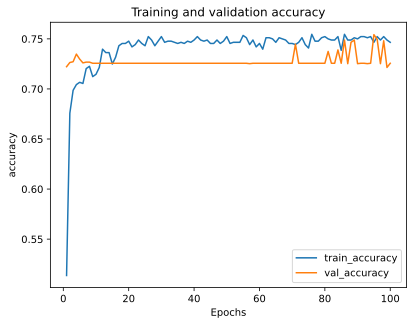

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(batched_history1, 'accuracy')
#plot_metric(batched_history, 'loss')
# batched_model.evaluate(X_test, y_test, verbose=2)

#### Entrenando la segunda red

##### Creando la segunda red

In [12]:
# Nueva arquitectura ajustada con Leaky ReLU y Linear
batched_model2 = Sequential([
    Dense(128, input_shape=(3,)),
    LeakyReLU(alpha=1),               # Leaky ReLU con alpha=0.1 (valor típico)
    BatchNormalization(),
    Dense(256),
    LeakyReLU(alpha=1),
    BatchNormalization(),
    Dense(256),
    LeakyReLU(alpha=1),
    BatchNormalization(),
    Dense(128),
    LeakyReLU(alpha=1),
    BatchNormalization(),
    Dense(64),
    LeakyReLU(alpha=1),
    BatchNormalization(),
    Dense(3, activation='linear')       # Capa de salida con Linear (para regresión)
])

In [13]:
# Función de pérdida Pseudo-Huber
def pseudo_huber_loss(y_true, y_pred, delta=1.0):
    y_true = tf.cast(y_true, dtype=tf.float32)
    error = y_true - y_pred
    delta_sq = delta ** 2
    return tf.reduce_mean(delta_sq * (tf.sqrt(1 + (error / delta_sq) ** 2) - 1))

In [14]:
# Función de pérdida Pseudo-Huber
def pseudo_huber_loss(y_true, y_pred, delta=1.0):
    y_true = tf.cast(y_true, dtype=tf.float32)
    error = y_true - y_pred
    delta_sq = delta ** 2
    return tf.reduce_mean(delta_sq * (tf.sqrt(1 + (error / delta_sq) ** 2) - 1))

# Compilar el modelo con Adagrad como optimizador y Pseudo-Huber Loss como función de pérdida
batched_model2.compile(
    optimizer=Adagrad(),
    loss=pseudo_huber_loss,
    metrics=['accuracy']
)

# Entrenar el modelo
batched_history2 =  batched_model2.fit(
    X_train, 
    y_train,
    epochs=300, 
    validation_split=0.25,
    batch_size=100,
    verbose=2
)

Epoch 1/300
27/27 - 1s - loss: 70195376.0000 - accuracy: 0.3002 - val_loss: 65262316.0000 - val_accuracy: 0.1644 - 1s/epoch - 47ms/step
Epoch 2/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.2983 - val_loss: 65262320.0000 - val_accuracy: 0.2489 - 87ms/epoch - 3ms/step
Epoch 3/300
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.2995 - val_loss: 65262320.0000 - val_accuracy: 0.3025 - 85ms/epoch - 3ms/step
Epoch 4/300
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.3116 - val_loss: 65262320.0000 - val_accuracy: 0.3493 - 84ms/epoch - 3ms/step
Epoch 5/300
27/27 - 0s - loss: 70195400.0000 - accuracy: 0.2972 - val_loss: 65262320.0000 - val_accuracy: 0.3813 - 87ms/epoch - 3ms/step
Epoch 6/300
27/27 - 0s - loss: 70195400.0000 - accuracy: 0.3086 - val_loss: 65262320.0000 - val_accuracy: 0.3858 - 90ms/epoch - 3ms/step
Epoch 7/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.3052 - val_loss: 65262320.0000 - val_accuracy: 0.3447 - 86ms/epoch - 3ms/step
Epoch 8/300
27/27 - 0s - loss: 70195400.00

Epoch 61/300
27/27 - 0s - loss: 70195400.0000 - accuracy: 0.3307 - val_loss: 65262320.0000 - val_accuracy: 0.3128 - 85ms/epoch - 3ms/step
Epoch 62/300
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.3303 - val_loss: 65262320.0000 - val_accuracy: 0.3151 - 85ms/epoch - 3ms/step
Epoch 63/300
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.3303 - val_loss: 65262320.0000 - val_accuracy: 0.3139 - 85ms/epoch - 3ms/step
Epoch 64/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.3326 - val_loss: 65262320.0000 - val_accuracy: 0.3162 - 84ms/epoch - 3ms/step
Epoch 65/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.3311 - val_loss: 65262320.0000 - val_accuracy: 0.3185 - 86ms/epoch - 3ms/step
Epoch 66/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.3364 - val_loss: 65262320.0000 - val_accuracy: 0.3208 - 84ms/epoch - 3ms/step
Epoch 67/300
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.3333 - val_loss: 65262320.0000 - val_accuracy: 0.3196 - 85ms/epoch - 3ms/step
Epoch 68/300
27/27 - 0s - loss: 70

Epoch 121/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.3025 - val_loss: 65262320.0000 - val_accuracy: 0.2717 - 87ms/epoch - 3ms/step
Epoch 122/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.3033 - val_loss: 65262320.0000 - val_accuracy: 0.2694 - 87ms/epoch - 3ms/step
Epoch 123/300
27/27 - 0s - loss: 70195400.0000 - accuracy: 0.2945 - val_loss: 65262320.0000 - val_accuracy: 0.2648 - 85ms/epoch - 3ms/step
Epoch 124/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.2995 - val_loss: 65262320.0000 - val_accuracy: 0.2637 - 86ms/epoch - 3ms/step
Epoch 125/300
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.2949 - val_loss: 65262320.0000 - val_accuracy: 0.2614 - 87ms/epoch - 3ms/step
Epoch 126/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.2979 - val_loss: 65262320.0000 - val_accuracy: 0.2637 - 93ms/epoch - 3ms/step
Epoch 127/300
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.2953 - val_loss: 65262320.0000 - val_accuracy: 0.2637 - 85ms/epoch - 3ms/step
Epoch 128/300
27/27 - 0s - 

Epoch 180/300
27/27 - 0s - loss: 70195400.0000 - accuracy: 0.3615 - val_loss: 65262320.0000 - val_accuracy: 0.3470 - 87ms/epoch - 3ms/step
Epoch 181/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.3642 - val_loss: 65262320.0000 - val_accuracy: 0.3539 - 86ms/epoch - 3ms/step
Epoch 182/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.3668 - val_loss: 65262320.0000 - val_accuracy: 0.3630 - 87ms/epoch - 3ms/step
Epoch 183/300
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.3782 - val_loss: 65262320.0000 - val_accuracy: 0.3687 - 86ms/epoch - 3ms/step
Epoch 184/300
27/27 - 0s - loss: 70195400.0000 - accuracy: 0.3779 - val_loss: 65262320.0000 - val_accuracy: 0.3790 - 86ms/epoch - 3ms/step
Epoch 185/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.3923 - val_loss: 65262320.0000 - val_accuracy: 0.3847 - 86ms/epoch - 3ms/step
Epoch 186/300
27/27 - 0s - loss: 70195376.0000 - accuracy: 0.4018 - val_loss: 65262320.0000 - val_accuracy: 0.3961 - 86ms/epoch - 3ms/step
Epoch 187/300
27/27 - 0s - 

Epoch 239/300
27/27 - 0s - loss: 70195400.0000 - accuracy: 0.4490 - val_loss: 65262312.0000 - val_accuracy: 0.4304 - 87ms/epoch - 3ms/step
Epoch 240/300
27/27 - 0s - loss: 70195376.0000 - accuracy: 0.4403 - val_loss: 65262312.0000 - val_accuracy: 0.4304 - 86ms/epoch - 3ms/step
Epoch 241/300
27/27 - 0s - loss: 70195376.0000 - accuracy: 0.4403 - val_loss: 65262312.0000 - val_accuracy: 0.4292 - 87ms/epoch - 3ms/step
Epoch 242/300
27/27 - 0s - loss: 70195400.0000 - accuracy: 0.4315 - val_loss: 65262312.0000 - val_accuracy: 0.4281 - 86ms/epoch - 3ms/step
Epoch 243/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.4410 - val_loss: 65262312.0000 - val_accuracy: 0.4281 - 86ms/epoch - 3ms/step
Epoch 244/300
27/27 - 0s - loss: 70195400.0000 - accuracy: 0.4346 - val_loss: 65262312.0000 - val_accuracy: 0.4281 - 87ms/epoch - 3ms/step
Epoch 245/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.4365 - val_loss: 65262312.0000 - val_accuracy: 0.4292 - 85ms/epoch - 3ms/step
Epoch 246/300
27/27 - 0s - 

Epoch 298/300
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.4068 - val_loss: 65262312.0000 - val_accuracy: 0.4041 - 90ms/epoch - 3ms/step
Epoch 299/300
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.4053 - val_loss: 65262312.0000 - val_accuracy: 0.4075 - 87ms/epoch - 3ms/step
Epoch 300/300
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.4113 - val_loss: 65262312.0000 - val_accuracy: 0.4053 - 87ms/epoch - 3ms/step


In [23]:
# Evaluar y mostrar los resultados de la Red Neuronal 2
print("Resultados de la Red Neuronal 2:")
loss, accuracy = batched_model2.evaluate(X_test, y_test, verbose=2)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Calcular y mostrar el RMSE y R² para la Red Neuronal 2
predictions = batched_model2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE (Red Neuronal 2):", rmse)
print("R² (Red Neuronal 2):", r2)

Resultados de la Red Neuronal 2:
28/28 - 0s - loss: 67779448.0000 - accuracy: 0.4258 - 35ms/epoch - 1ms/step
Loss: 67779448.0
Accuracy: 0.42579910159111023
28/28 [==============================] - 0s 808us/step
RMSE (Red Neuronal 2): 148651352.0772564
R² (Red Neuronal 2): -0.5256259839914829


##### Graficando

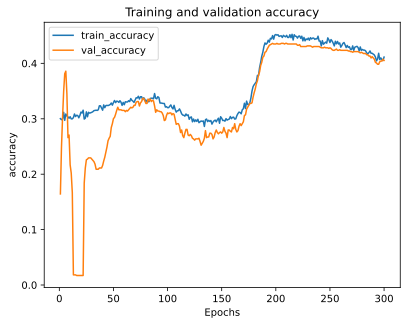

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(batched_history2, 'accuracy')
#plot_metric(batched_history, 'loss')
# batched_model.evaluate(X_test, y_test, verbose=2)

#### Entrenando una tercera red

##### Creando la tercera red

In [17]:
# Nueva arquitectura ajustada con ReLU y Linear (capa de salida)
batched_model3 = Sequential([
    Dense(128, input_shape=(3,)),
    Activation('relu'),                # Usando ReLU como activación en la capa oculta.
    BatchNormalization(),
    Dense(256),
    Activation('relu'),                # Usando ReLU como activación en la capa oculta.
    BatchNormalization(),
    Dense(256),
    Activation('relu'),                # Usando ReLU como activación en la capa oculta.
    BatchNormalization(),
    Dense(128),
    Activation('relu'),                # Usando ReLU como activación en la capa oculta.
    BatchNormalization(),
    Dense(64),
    Activation('relu'),                # Usando ReLU como activación en la capa oculta.
    BatchNormalization(),
    Dense(3, activation='linear')       # Capa de salida con 'linear' para regresión.
])

In [18]:
batched_model3.compile(
    optimizer=Adam(),
    loss=pseudo_huber_loss,
    metrics=['accuracy']
)

In [19]:
# Entrenar el modelo
batched_history3 =  batched_model3.fit(
    X_train, 
    y_train,
    epochs=100,
    validation_split=0.25,
    batch_size=100,
    verbose=2
)

Epoch 1/100
27/27 - 2s - loss: 70195384.0000 - accuracy: 0.3771 - val_loss: 65262320.0000 - val_accuracy: 0.4817 - 2s/epoch - 70ms/step
Epoch 2/100
27/27 - 0s - loss: 70195368.0000 - accuracy: 0.3623 - val_loss: 65262320.0000 - val_accuracy: 0.6598 - 86ms/epoch - 3ms/step
Epoch 3/100
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.4490 - val_loss: 65262320.0000 - val_accuracy: 0.6724 - 86ms/epoch - 3ms/step
Epoch 4/100
27/27 - 0s - loss: 70195400.0000 - accuracy: 0.4635 - val_loss: 65262316.0000 - val_accuracy: 0.6826 - 86ms/epoch - 3ms/step
Epoch 5/100
27/27 - 0s - loss: 70195384.0000 - accuracy: 0.3954 - val_loss: 65262312.0000 - val_accuracy: 0.6872 - 85ms/epoch - 3ms/step
Epoch 6/100
27/27 - 0s - loss: 70195376.0000 - accuracy: 0.4711 - val_loss: 65262312.0000 - val_accuracy: 0.6792 - 85ms/epoch - 3ms/step
Epoch 7/100
27/27 - 0s - loss: 70195392.0000 - accuracy: 0.4749 - val_loss: 65262312.0000 - val_accuracy: 0.6815 - 85ms/epoch - 3ms/step
Epoch 8/100
27/27 - 0s - loss: 70195376.00

Epoch 61/100
27/27 - 0s - loss: 70194984.0000 - accuracy: 0.6499 - val_loss: 65261844.0000 - val_accuracy: 0.7135 - 84ms/epoch - 3ms/step
Epoch 62/100
27/27 - 0s - loss: 70194976.0000 - accuracy: 0.6579 - val_loss: 65262764.0000 - val_accuracy: 0.3756 - 86ms/epoch - 3ms/step
Epoch 63/100
27/27 - 0s - loss: 70194952.0000 - accuracy: 0.6263 - val_loss: 65263016.0000 - val_accuracy: 0.2717 - 85ms/epoch - 3ms/step
Epoch 64/100
27/27 - 0s - loss: 70194944.0000 - accuracy: 0.6248 - val_loss: 65262288.0000 - val_accuracy: 0.3779 - 84ms/epoch - 3ms/step
Epoch 65/100
27/27 - 0s - loss: 70194928.0000 - accuracy: 0.6533 - val_loss: 65262088.0000 - val_accuracy: 0.2728 - 85ms/epoch - 3ms/step
Epoch 66/100
27/27 - 0s - loss: 70194920.0000 - accuracy: 0.6541 - val_loss: 65261944.0000 - val_accuracy: 0.5046 - 84ms/epoch - 3ms/step
Epoch 67/100
27/27 - 0s - loss: 70194896.0000 - accuracy: 0.6583 - val_loss: 65261904.0000 - val_accuracy: 0.5308 - 85ms/epoch - 3ms/step
Epoch 68/100
27/27 - 0s - loss: 70

In [20]:
# Evaluar y mostrar los resultados de la Red Neuronal 3
print("Resultados de la Red Neuronal 3:")
loss, accuracy = batched_model3.evaluate(X_test, y_test, verbose=2)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Calcular y mostrar el RMSE y R² para la Red Neuronal 3
predictions = batched_model3.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE (Red Neuronal 3):", rmse)
print("R² (Red Neuronal 3):", r2)

Resultados de la Red Neuronal 3:
28/28 - 0s - loss: 67778400.0000 - accuracy: 0.6895 - 36ms/epoch - 1ms/step
Loss: 67778400.0
Accuracy: 0.689497709274292
28/28 [==============================] - 0s 827us/step
RMSE (Red Neuronal 3): 148650820.32231092
R² (Red Neuronal 3): -0.5256012807938001


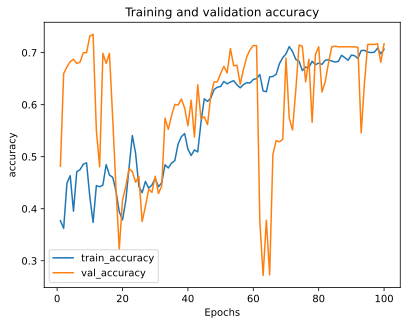

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(batched_history3, 'accuracy')
#plot_metric(batched_history, 'loss')
# batched_model.evaluate(X_test, y_test, verbose=2)